# Assignment 8

For this assignment , we will use the college scorecard dataset. 
<pre>
From the 22 individual school year data files, randomly (using Python) select one file. 
Only read the column "TUITIONFEE_IN" frm this file into a data frame.
Find out how many observations this data frame has.
Find out how many observations that have missing value. Drop those observations.
Find out how many observations that have value of zero. Drop those observations.
Calculate the mean of the tuition.
Randomly select one observation, find out the tuition of that observation.
Calculate the different between the tuition of this observation and the average tuition (mean) off all observations above.
Randomly select another observation and repeat the above.
Randomly select another observation and repeat the above.
Randomly select 5 observations, display the tuition of these observation.
Calculate the average of these 5 observations
Calculate the different between the average tuition of thes 5 observations and the average tuition (mean) off all observations above.
Randomly select another 5 observations and repeat the above.
Randomly select another 5 observation and repeat the above.

Randomly select 10 observations, display the tuition of these observation.
Calculate the average of these 10 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 10 observations and repeat the above.
Randomly select another 10 observation and repeat the above.


## Section 1

In [1]:
# 1 - Import necessary libraries

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Section 2

In [2]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

path='/Users/masoud/Documents/CollegeScorecard_Raw_Data/'
file_names=os.listdir(path)
cleansed_file_names=[k for k in file_names if k.find('MERGED') != -1]
cleansed_file_names

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv']

## Section 3

In [4]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

print('Total number of files =',len(cleansed_file_names))

file_name = cleansed_file_names[random.randint(0,22)]

print('The name of the randomly chosen file is ',file_name)

Total number of files = 23
The name of the randomly chosen file is  MERGED2003_04_PP.csv


## Section 4

In [5]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

cols = ['INSTNM','TUITIONFEE_IN']
df=pd.read_csv(path+file_name, usecols=cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6673 entries, 0 to 6672
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         6673 non-null   object 
 1   TUITIONFEE_IN  4149 non-null   float64
dtypes: float64(1), object(1)
memory usage: 104.4+ KB


## Section 5

In [6]:
# 5 - Find out how many observations have missing value.

df[df.INSTNM.isna()==True]

,INSTNM,TUITIONFEE_IN


In [7]:
df[df.TUITIONFEE_IN.isna()==True]

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
8,Athens State University,NaN
25,GADSDEN BUSINESS COLLEGE-ANNISTON,NaN
67,TROY STATE UNIVERSITY-PHENIX CITY,NaN
71,United States Sports Academy,NaN
...,...,...
6666,Altierus Career College-Tacoma,NaN
6667,DeVry University-Oregon,NaN
6669,Creative Images Institute of Cosmetology-South...,NaN
6671,Fortis Institute-Jacksonville,NaN


In [8]:
print('The total number of rows with a missing value is', len(df[df.TUITIONFEE_IN.isna()==True]))

The total number of rows with a missing value is 2524


## Section 6

In [9]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward

df.dropna(axis=0, inplace=True)
df.shape

(4149, 2)

## Section 7

In [10]:
# 7 - Find out how many observations have 0 tution. 

df[df.TUITIONFEE_IN==0]

,INSTNM,TUITIONFEE_IN
448,Harbor-UCLA Medical Center,0.0
721,United States Air Force Academy,0.0
1899,United States Naval Academy,0.0
2474,Benefis Healthcare School of Radiologic Techno...,0.0
3042,United States Merchant Marine Academy,0.0
3043,United States Military Academy,0.0
3050,Webb Institute,0.0
5815,Charles H McCann Technical School,0.0


In [11]:
print('The total number of observations with 0 tuition is', len(df[df.TUITIONFEE_IN==0]))

The total number of observations with 0 tuition is 8


## Section 8

In [12]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward

df=df[df.TUITIONFEE_IN != 0]

print('The total number of observation after droping 0 tuition is',df.shape[0])

The total number of observation after droping 0 tuition is 4141


## Section 9

In [13]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 

average_tuition = df.TUITIONFEE_IN.mean()

print('The average tuition of colleges is', round(average_tuition,2), 'dollars')

The average tuition of colleges is 8397.23 dollars


## Section 10

In [14]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 

df.insert(0,'Index',range(1,len(df)+1))
df.set_index('Index', inplace=True)

In [15]:
random_obs = df.iloc[random.randint(1,len(df))]
random_obs

INSTNM           Aiken Technical College
TUITIONFEE_IN                       2600
Name: 2803, dtype: object

## Section 11

In [16]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

difference = random_obs[1] - average_tuition
print('Tuition difference between {} and the mean is'.
      format(random_obs[0]),round(difference,2),'dollars')

Tuition difference between Aiken Technical College and the mean is -5797.23 dollars


## Section 12

In [17]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

for i in range(1,6):
    random_obs = df.iloc[random.randint(1,len(df))]
    difference = random_obs[1] - average_tuition
    print('Tuition difference between {} and the mean is'.
      format(random_obs[0]),round(difference,2),'dollars')

Tuition difference between Bloomsburg University of Pennsylvania and the mean is -2553.23 dollars
Tuition difference between Ralph R Willis Career and Technical Center and the mean is -7047.23 dollars
Tuition difference between Texas State Technical College-Marshall and the mean is -5211.23 dollars
Tuition difference between Ozarka College and the mean is -6412.23 dollars
Tuition difference between Santiago Canyon College and the mean is -7965.23 dollars


## Section 13

In [18]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 

random_list = random.sample(range(1,len(df)),20)

random_sample=[[df.iloc[i][0],df.iloc[i][1]] for i in random_list]
random_sample

[['Neosho County Community College', 1760.0],
 ['Holy Name Medical Center-Sister Claire Tynan School of Nursing', 10850.0],
 ['Lake Superior State University', 5454.0],
 ['Durham Technical Community College', 1136.0],
 ['Millersville University of Pennsylvania', 5819.0],
 ['Olean Business Institute', 8000.0],
 ['Gainesville State College', 1556.0],
 ['Kapiolani Community College', 1140.0],
 ['University of Phoenix-Philadelphia Campus', 11400.0],
 ['DeVry University-Colorado', 10590.0],
 ['Missouri College', 10045.0],
 ['Cottey College', 10000.0],
 ['Harrison College-Anderson', 8025.0],
 ['College of Southern Idaho', 1650.0],
 ['New Hope Christian College-Eugene', 7506.0],
 ['Heartland Community College', 1650.0],
 ['Southeastern Baptist Theological Seminary', 3620.0],
 ['Holy Family University', 15490.0],
 ["Tohono O'odham Community College", 1008.0],
 ['University of California-Irvine', 6165.0]]

## Section 14

In [19]:
# 14 - Calculate and display the mean tuition of these 20 observations

sample_ave_tuition = sum([random_sample[i][1] for i in range(20)])/20
print('The mean tuition of the sample is',round(sample_ave_tuition,2),'dollars')

The mean tuition of the sample is 6143.2 dollars


## Section 15

In [20]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference

diff_sample_pop = sample_ave_tuition - average_tuition
print('Difference between the sample and the population means in tuition is',round(diff_sample_pop,2),'dollars')

Difference between the sample and the population means in tuition is -2254.03 dollars


## Section 16

In [21]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

for k in range(1,6):
    random_list = random.sample(range(1,len(df)),20)
    random_sample=[df.iloc[i][1] for i in random_list]
    sample_ave_tuition = sum([random_sample[i] for i in range(20)])/20
    diff_sample_pop = sample_ave_tuition - average_tuition
    print('Difference between the sample and the population means in tuition is',round(diff_sample_pop,2)
          ,'dollars')

Difference between the sample and the population means in tuition is -1370.48 dollars
Difference between the sample and the population means in tuition is -472.13 dollars
Difference between the sample and the population means in tuition is 1439.12 dollars
Difference between the sample and the population means in tuition is 1293.97 dollars
Difference between the sample and the population means in tuition is 1621.32 dollars


## Section 17

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [22]:
# 17 - write function Code here

def difference(x,y):
    average_tuition = y.TUITIONFEE_IN.mean()
    random_list = random.sample(range(1,len(y)),x)
    random_sample = [y.iloc[i][1] for i in random_list]
    sample_ave_tuition = sum([random_sample[i] for i in range(x)])/x
    diff_sample_pop = sample_ave_tuition - average_tuition
    return diff_sample_pop

## Section 18

In [23]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function

difference(100,df)

-56.876032359332385

## Section 19

In [24]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50

sample_sizes = [i for i in range(1,51)]
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


## Section 20

In [25]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff = []
for i in sample_sizes:
    means_diff.append(round(difference(i,df),2))

In [26]:
print(means_diff)

[-2627.23, 1586.77, -595.23, 804.27, -2683.43, -335.73, -5507.23, -391.48, 2141.11, -2553.53, 125.05, -438.89, 1898.47, -976.23, 383.97, 90.15, -2108.34, 1250.94, 1006.04, 2493.92, 1217.96, -545.5, 417.56, -976.77, -246.71, 2295.62, 989.44, 2438.17, 69.46, 1554.44, 389.84, -2063.1, -681.92, -2232.87, 822.43, 630.55, 516.64, 88.67, 1187.75, -973.53, -1307.08, 1024.61, -205.06, -592.14, 303.91, -1062.7, 366.6, -160.43, -1375.02, -2650.83]


## Section 21

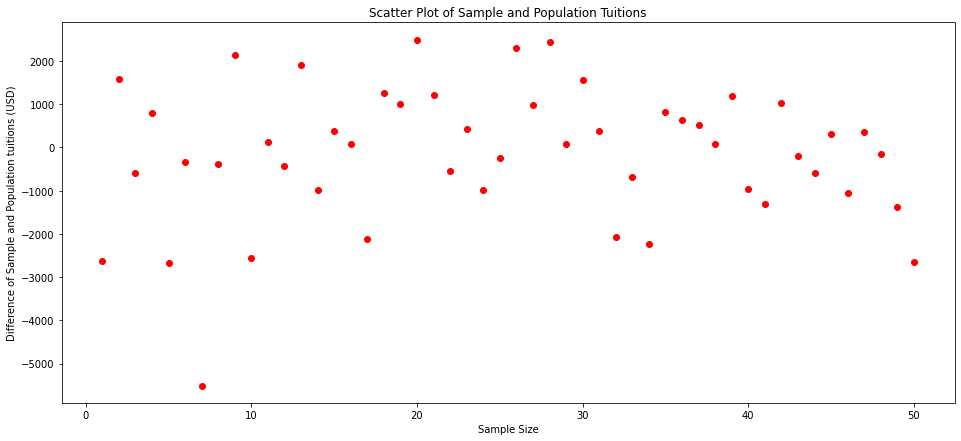

In [27]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 

fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(sample_sizes, means_diff,color='r')
ax.set_title('Scatter Plot of Sample and Population Tuitions')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Difference of Sample and Population tuitions (USD)')
plt.show()

## Section 22

In [28]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.

# sample size = 300

sample_sizes = [i for i in range(1,301)]

means_diff = []
for i in sample_sizes:
    means_diff.append(round(difference(i,df),2))

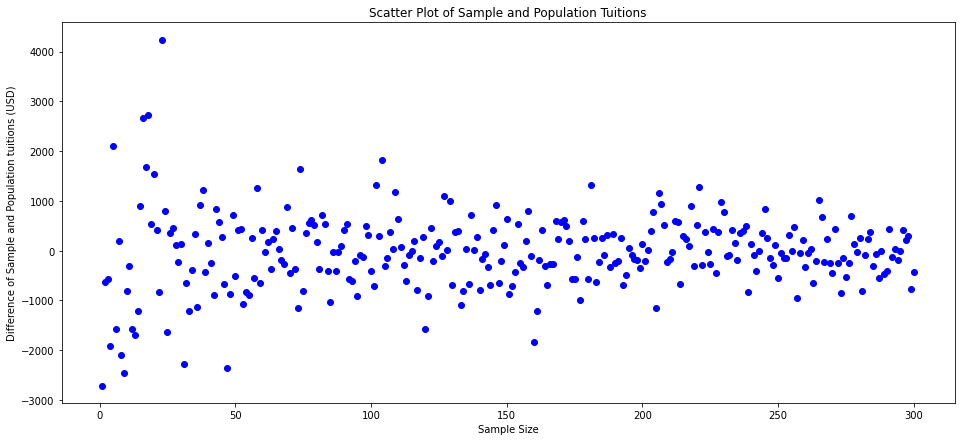

In [29]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(sample_sizes, means_diff,color='b')
ax.set_title('Scatter Plot of Sample and Population Tuitions')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Difference of Sample and Population tuitions (USD)')
plt.show()

In [30]:
# sample size = 1000

sample_sizes = [i for i in range(1,1001)]

means_diff = []
for i in sample_sizes:
    means_diff.append(round(difference(i,df),2))

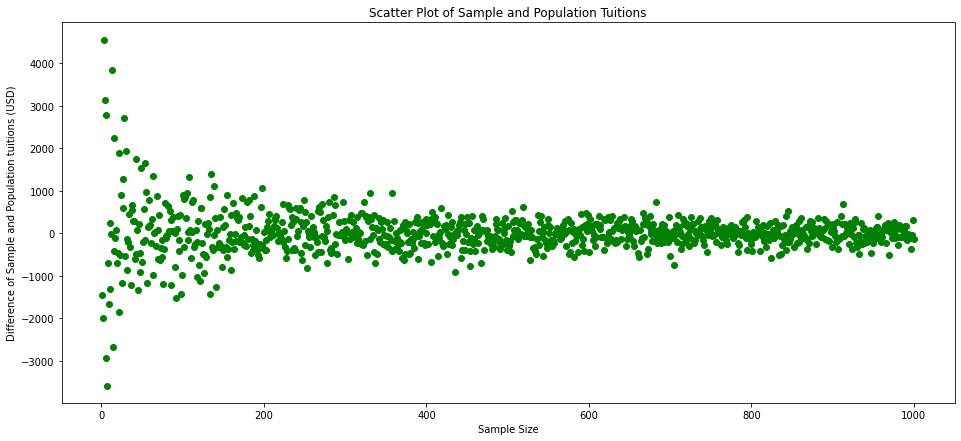

In [31]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(sample_sizes, means_diff,color='g')
ax.set_title('Scatter Plot of Sample and Population Tuitions')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Difference of Sample and Population tuitions (USD)')
plt.show()

As expected, when the sizes of the samples are increased the difference converges to 0! 